<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A posterior analysis of the fit of GARCH-type volatility models

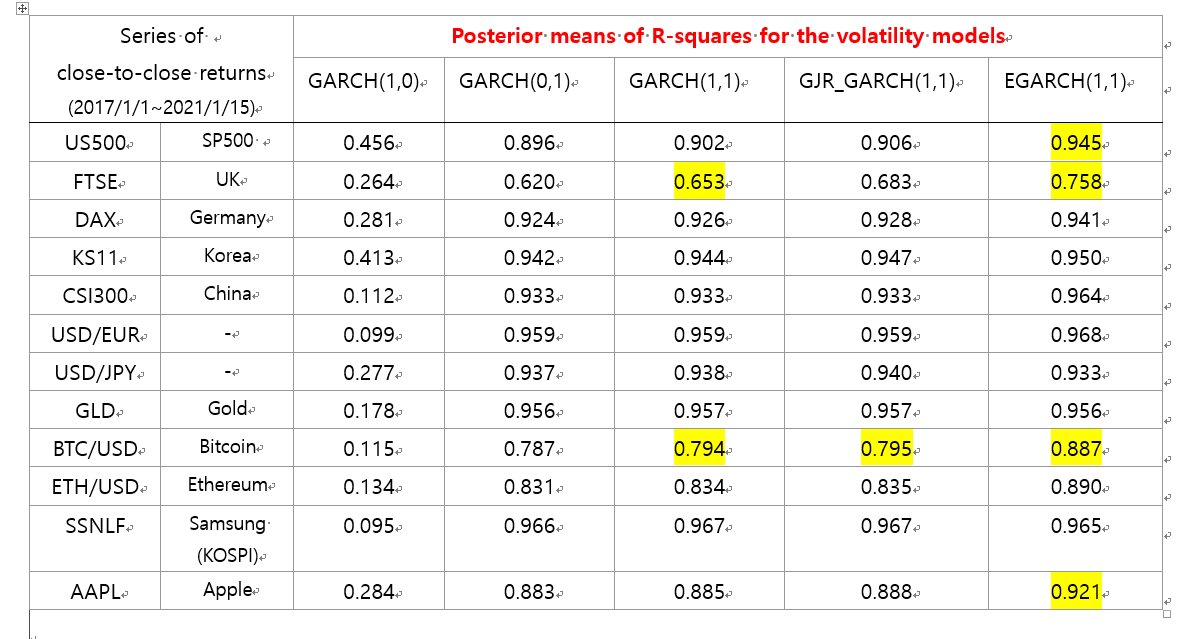

In [1]:
!pip install -U finance-datareader
!pip install arviz==0.6.1
!pip install pymc3==3.8

import arviz as az
import pymc3 as pm


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Requirement already up-to-date: finance-datareader in /usr/local/lib/python3.6/dist-packages (0.9.14)


In [2]:
i=4
sName = pd.read_csv('주식종목.csv')      
sName


,code
0,BTC/USD
1,USD/JPY
2,USD/EUR
3,KS11
4,US500
5,JP225
6,CSI300
7,HSI
8,FTSE
9,DAX


In [3]:
import FinanceDataReader as fdr
fdr.__version__

'0.9.14'

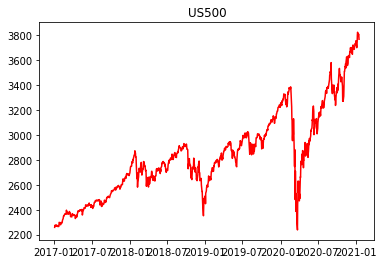

In [4]:

df = fdr.DataReader(sName.code[i], '2017')  # 시작연도의 처음부터 현재까지 종가
#df = fdr.DataReader("SSNLF", '2017')  # 골드, GOOG =구글 

df = df['Close']
plt.plot(df, "r")
plt.title(sName.code[i])
plt.show()


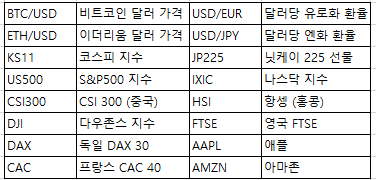

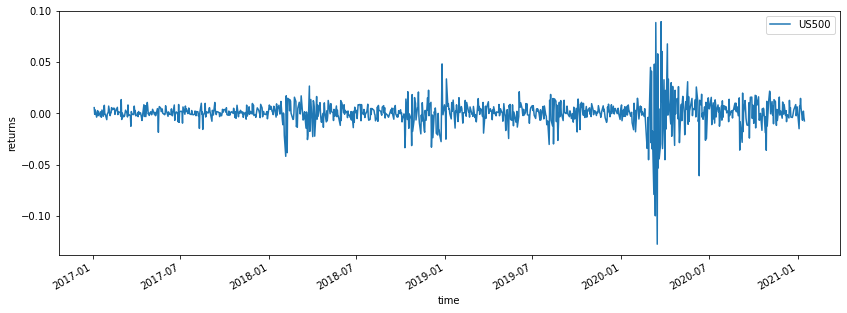

In [5]:
returns= np.log(df).diff().dropna()
returns.head()
Y=returns

fig, ax = plt.subplots(figsize=(14, 5))
returns.plot(y="change", label=sName.code[i], ax=ax)
ax.set(xlabel='time', ylabel='returns')
ax.legend();

#Model setup
For the prior distribution of variance process, we use the distribution of random walks with an unknown step size.

This turns out quite flexible to capture most volatility patterns without imposing any parametric assumptioin.

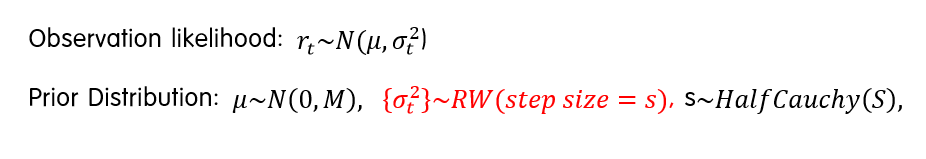

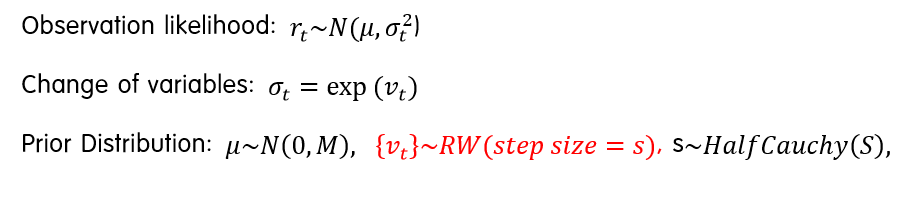

In [6]:
import theano.tensor as tt

with pm.Model() as model:
        step_size = pm.HalfCauchy('step_size', 5)
        volatility = pm.GaussianRandomWalk('volatility', sigma=step_size, shape=len(Y))
        mu = pm.Normal('mu', mu=0, sd=10)
        var = pm.Deterministic('variance', tt.exp(-volatility)**2)
        like = pm.Normal('likelihood',  mu=mu, sd=tt.sqrt(var), observed=Y)                        
        trace = pm.sample(2000, chains=1, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu, volatility, step_size]
Sampling chain 0, 0 divergences: 100%|██████████| 3000/3000 [01:44<00:00, 28.76it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


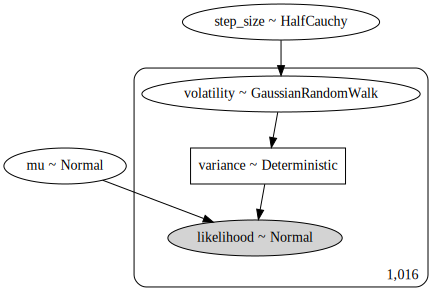

In [58]:
pm.model_to_graphviz(model)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
volatility[0],5.631,0.319,5.055,6.249,0.007,0.005,2384.0,2384.0,2443.0,1452.0,NaN
volatility[1],5.660,0.302,5.139,6.269,0.006,0.004,2662.0,2662.0,2749.0,1440.0,NaN
volatility[2],5.672,0.290,5.143,6.224,0.006,0.004,2522.0,2522.0,2712.0,1552.0,NaN
volatility[3],5.677,0.279,5.137,6.170,0.006,0.004,2116.0,2116.0,2344.0,1181.0,NaN
volatility[4],5.708,0.278,5.222,6.259,0.006,0.004,2501.0,2501.0,2681.0,1316.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
variance[1011],0.000,0.000,0.000,0.000,0.000,0.000,2053.0,1616.0,3058.0,1475.0,NaN
variance[1012],0.000,0.000,0.000,0.000,0.000,0.000,1999.0,1624.0,3103.0,1576.0,NaN
variance[1013],0.000,0.000,0.000,0.000,0.000,0.000,2226.0,1806.0,3269.0,1753.0,NaN
variance[1014],0.000,0.000,0.000,0.000,0.000,0.000,2016.0,1863.0,2888.0,1534.0,NaN


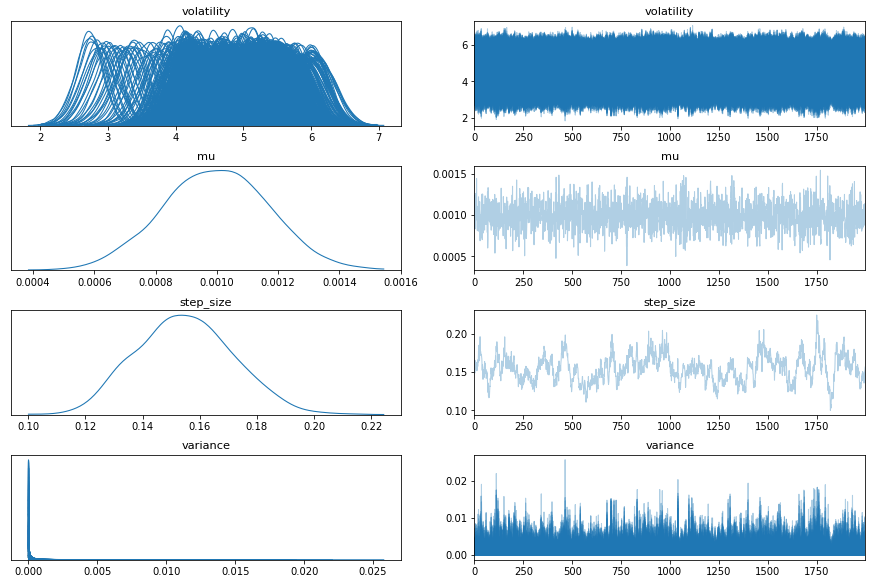

In [59]:
pm.traceplot(trace)
pm.summary(trace)

In [78]:
pm.summary(np.sqrt(trace.variance[:1000]))

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
x,0.009,0.009,0.002,0.02,0.0,0.0,22657.0,22657.0,14886.0,32477.0,1.07


In [71]:
trace.variance.shape

(2000, 1016)

In [68]:
pm.summary(trace.step_size)

/usr/local/lib/python3.6/dist-packages/pymc3/backends/base.py:346: UserWarning: Attribute access on a trace object is ambigous. Sampler statistic and model variable share a name. Use trace.get_values or trace.get_sampler_stats.
  warnings.warn("Attribute access on a trace object is ambigous. "
arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 2000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
x,0.155,0.017,0.125,0.186,0.002,0.002,63.0,63.0,63.0,188.0,NaN


In [ ]:
pm.summary(trace.mu)

 ...]

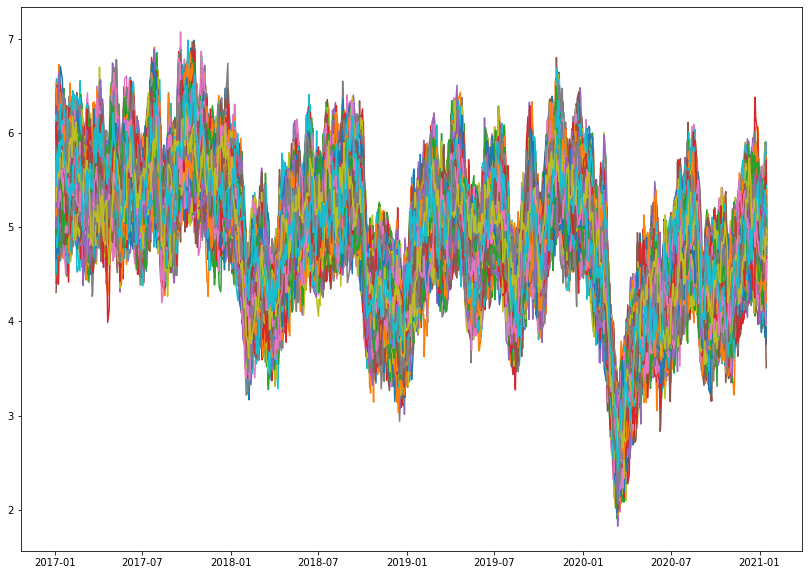

In [83]:
fig, ax = plt.subplots(figsize=(14, 10))

y_vals = np.sqrt(trace['variance'][::1]).T  ## stdev = exp(-volatility)
#y_vals = trace['volatility'][::1].T   # random walk 

x_vals = np.vstack([returns.index for _ in y_vals.T]).T.astype(np.datetime64)
plt.plot(x_vals, y_vals)

# Posteior anlysis for the fit of GARCH model
* Unlike in the ARCH type models, there is no dynamics in the Random Walk volatility process.
* So it is of little use for a prediction purpose. 
* However, it can be used as a touchstone of volatility dynamics.
* We can evaluate the fit of parametric volatility models using the posterior sample of the RW variance process, specifically calculating the distribution of R square attainable by a specific model, such as GARCH(p,q) .   
* This test strategy makes it possible to select the right model for a given data, and may also provide aninsight to develop better volatility models.  

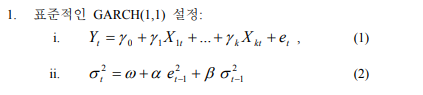

In [10]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Constant Volatility

In [11]:

#niter=len(trace)
#r2=np.zeros(niter)
#T=len(Y)

#for i in range(niter):
#  lhs = trace.variance[i,1:T]
#  rhs1 = (Y[0:T-1] - trace.mu[i])**2 
#  rhs2 = trace.variance[i, 0:T-1]

  ## 회귀분석
#  X2=np.ones(T-1)
#  y = lhs
#  est = sm.OLS(y, X2)
#  est2 = est.fit()
#  r2[i]= est2.rsquared_adj
#plt.hist(r2, bins=20, density=True, alpha=0.9, histtype='stepfilled')
#r2=pd.DataFrame(r2)
#r2.describe()

# GARCH(1,0)

In [27]:
niter=len(trace); r2=np.zeros(niter); T=len(Y)
for i in range(niter):
  lhs = trace.variance[i,1:T]; rhs1 = (Y[0:T-1] - trace.mu[i])**2 ; rhs2 = trace.variance[i, 0:T-1]
  X=rhs1;   y = lhs;   X2 = sm.add_constant(X) 
  est = sm.OLS(y, X2); est2 = est.fit(); r2[i]= est2.rsquared_adj
#plt.hist(r2, bins=30, density=True, alpha=0.9, histtype='stepfilled')
r2=pd.DataFrame(r2) ; r2.describe()

,0
count,2000.000000
mean,0.456384
std,0.081522
min,0.180446
25%,0.400927
50%,0.455250
75%,0.511425
max,0.690641


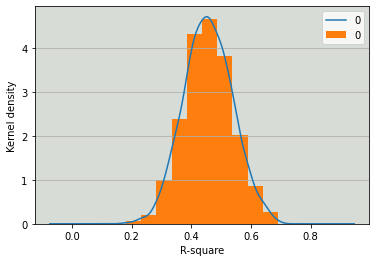

In [38]:
fig, ax = plt.subplots()
r2.plot.kde(ax=ax, legend=True, title='')
r2.plot.hist(density=True, ax=ax)
ax.set_ylabel('Kernel density')
ax.set_xlabel('R-square')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

# GARCH(0,1)

,0
count,2000.000000
mean,0.899619
std,0.034801
min,0.711717
25%,0.881020
50%,0.906445
75%,0.924458
max,0.968436


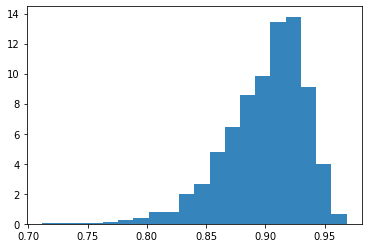

In [13]:
niter=len(trace);r2=np.zeros(niter);T=len(Y)
for i in range(niter):
  lhs = trace.variance[i,1:T];   rhs1 = (Y[0:T-1] - trace.mu[i])**2 ;   rhs2 = trace.variance[i, 0:T-1]
  X=rhs2;   y = lhs;    X2 = sm.add_constant(X) 
  est = sm.OLS(y, X2);   est2 = est.fit();   r2[i]= est2.rsquared_adj
#plt.hist(r2, bins=20, density=True, alpha=0.9, histtype='stepfilled')
r2=pd.DataFrame(r2); r2.describe()

# GARCH(1,1)

,0
count,2000.000000
mean,0.905061
std,0.033388
min,0.721026
25%,0.887029
50%,0.911615
75%,0.928567
max,0.971726


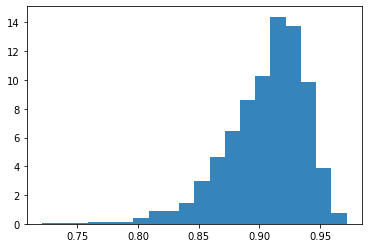

In [39]:
niter=len(trace); r2=np.zeros(niter); T=len(Y)
for i in range(niter):
  lhs = trace.variance[i,1:T];  rhs1 = (Y[0:T-1] - trace.mu[i])**2 ;  rhs2 = trace.variance[i, 0:T-1]
  X=np.vstack([rhs1, rhs2]).T ;   y = lhs;   X2 = sm.add_constant(X) 
  est = sm.OLS(y, X2);   est2 = est.fit();   r2[i]= est2.rsquared_adj
#plt.hist(r2, bins=20, density=True, alpha=0.9, histtype='stepfilled')
r2=pd.DataFrame(r2); r2.describe()

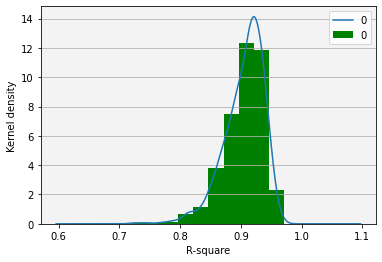

In [54]:
fig, ax = plt.subplots()
r2.plot.kde(ax=ax, legend=True, title='')
r2.plot.hist(density=True, ax=ax, color='green')
ax.set_ylabel('Kernel density')
ax.set_xlabel('R-square')
ax.grid(axis='y')
ax.set_facecolor('#f2f3f2')

# GJR GARCH(1,1)

In [ ]:
niter=len(trace); r2=np.zeros(niter); T=len(Y)
for i in range(niter):
  lhs = trace.variance[i,1:T];   rhs1 = (Y[0:T-1] - trace.mu[i])**2 ;   rhs2 = trace.variance[i, 0:T-1]
  dummy = 1*(Y[0:T-1] < 1*trace.mu[i])*rhs1   ## negative shock 의 additional effect
  X=np.vstack([rhs1, rhs2, dummy]).T;   y = lhs;   X2 = sm.add_constant(X) 
  est = sm.OLS(y, X2);   est2 = est.fit();   r2[i]= est2.rsquared_adj
plt.hist(r2, bins=20, density=True, alpha=0.9, histtype='stepfilled')
r2=pd.DataFrame(r2); r2.describe()

# EGARCH

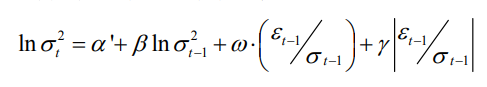

,0
count,2000.000000
mean,0.947209
std,0.009735
min,0.904954
25%,0.940802
50%,0.947826
75%,0.954077
max,0.974385


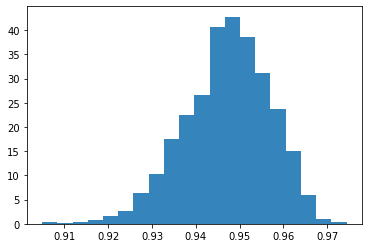

In [55]:
niter=len(trace); r2=np.zeros(niter); T=len(Y)
for i in range(niter):
  lhs = np.log(trace.variance[i,1:T]);  
  rhs1 = np.log(trace.variance[i, 0:T-1]);
  rhs2 = (Y[0:T-1] - trace.mu[i])/np.sqrt(trace.variance[i, 0:T-1]); 
  rhs3 = np.abs((Y[0:T-1] - trace.mu[i])/np.sqrt(trace.variance[i, 0:T-1])) 
   
  X=np.vstack([rhs1, rhs2, rhs3]).T ;   y = lhs;   X2 = sm.add_constant(X) 
  est = sm.OLS(y, X2);   est2 = est.fit();   r2[i]= est2.rsquared_adj
#plt.hist(r2, bins=20, density=True, alpha=0.9, histtype='stepfilled')
r2=pd.DataFrame(r2); r2.describe()

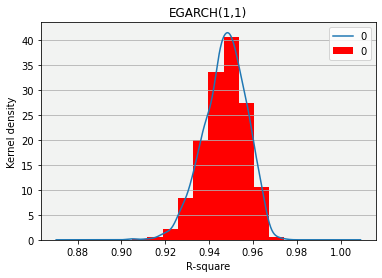

In [57]:
fig, ax = plt.subplots()
r2.plot.kde(ax=ax, legend=True, title='EGARCH(1,1)')
r2.plot.hist(density=True, ax=ax, color='red')
ax.set_ylabel('Kernel density')
ax.set_xlabel('R-square')
ax.grid(axis='y')
ax.set_facecolor('#f2f3f2')